In [43]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import torch
torch.cuda.is_available()

True

In [3]:
# # Paths to your image and mask .npy files
# image_file_path = r'/content/drive/MyDrive/Deep_learning_for_Medical_image_processing /data/Train_img_10frame_256.npy'
# mask_file_path = r'/content/drive/MyDrive/Deep_learning_for_Medical_image_processing /data/Train_msk_10frame_256.npy'

# img= np.load(image_file_path)
# msk= np.load(mask_file_path)

# print("shape of input image:",img.shape)

# img_train= img[:150,:,:,:]
# msk_train= msk[:150,:,:,:]
# img_test= img[150:,:,:,:]
# msk_test= msk[:150,:,:,:]

# np.save('/content/drive/MyDrive/Deep_learning_for_Medical_image_processing /data/Train_img_10frame_256_tr.npy',img_train)
# np.save('/content/drive/MyDrive/Deep_learning_for_Medical_image_processing /data/Train_msk_10frame_256_tr.npy',msk_train)


# np.save('/content/drive/MyDrive/Deep_learning_for_Medical_image_processing /data/Train_img_10frame_256_tst.npy',img_test)
# np.save('/content/drive/MyDrive/Deep_learning_for_Medical_image_processing /data/Train_msk_10frame_256_tst.npy',msk_test)



## Dataset without Augmentation

In [4]:
# import torch
# import numpy as np
# from torch.utils.data import Dataset, DataLoader

# class CustomDataset(Dataset):
#     def __init__(self, image_file_path, mask_file_path):
#         self.images = np.load(image_file_path)
#         self.masks = np.load(mask_file_path)

#     def __getitem__(self, index):
#         # Get an individual image and mask pair from the dataset
#         image = self.images[index]
#         mask = self.masks[index]

#         # Convert the image and mask to PyTorch tensors
#         image = torch.from_numpy(image)
#         mask = torch.from_numpy(mask)

#         # Return the processed image and mask
#         return image, mask

#     def __len__(self):
#         return len(self.images)

# ################################################ train data
# # Paths to your image and mask .npy files
# image_file_path_tr = r'/content/drive/MyDrive/data/Train_img_10frame_256.npy'
# mask_file_path_tr = r'/content/drive/MyDrive/data/Train_msk_10frame_256.npy'


# batch_size = 5
# val_split = 0.2

# # Create an instance of your custom dataset
# dataset = CustomDataset(image_file_path_tr, mask_file_path_tr)

# dataset_size = len(dataset)
# val_size = int(val_split * dataset_size)
# train_size = dataset_size - val_size
# print(dataset_size, val_size, train_size)
# train_set, val_set = torch.utils.data.random_split(dataset, [train_size, val_size])

# # Create a DataLoader
# train_dataloader = DataLoader(train_set, batch_size=batch_size , shuffle=True, num_workers=0)
# val_dataloader = DataLoader(val_set, batch_size=batch_size , shuffle=True, num_workers=0)
# ################################################ validation data
# # Paths to your image and mask .npy files
# image_file_path_val = r'/content/drive/MyDrive/data/Test_img_10frame_256.npy'
# mask_file_path_val = r'/content/drive/MyDrive/data/Test_msk_10frame_256.npy'


# # Create an instance of your custom dataset
# dataset = CustomDataset(image_file_path_val, mask_file_path_val)

# # Create a DataLoader
# test_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

# print("train_loader:", len(train_set))
# print("val_loader:", len(val_set))
# print("test_loader:", len(dataset))


# # Iterate over the dataloader to access batches of image and mask pairs
# # for batch in test_dataloader:
# #     # Unpack the batch into images and masks
# #     images, masks = batch
# #     print(images.shape)
# #     print(masks.shape)


## Preprocessing

In [5]:
!pip install SimpleITK

In [45]:
import glob
import os

import h5py
import numpy as np
import SimpleITK as sitk
import numpy as np
from scipy.ndimage import zoom
import os
from tqdm import tqdm
from skimage.transform import resize
import nibabel as nib

In [7]:
# def normalise(image):
#     image = (image - image.min()) / (image.max() - image.min())
#     image = image.astype(np.float32)
#     return image

# def resize_image(image):
#     new_depth = 10
#     new_width = 256
#     new_height = 256
#     image = resize(image, (new_depth, new_width, new_height),anti_aliasing=True , order=5,mode='constant')
#     return image

# def reshape_mask(mask):
#     # Specify the desired new shape
#     new_depth = 10
#     new_width = 256
#     new_height = 256

#     # Reshape the mask using zoom and nearest neighbor interpolation
#     resized_mask = zoom(mask, (new_depth / mask.shape[0], new_width / mask.shape[1], new_height / mask.shape[2]), order=0)

#     # Convert the resized_mask to integers to remove any interpolated values
#     resized_mask = resized_mask.astype(np.int32)
#     return resized_mask

# data_path = '/content/drive/MyDrive/data/data'
# new_path = '/content/drive/MyDrive/data/new_data'

# train_images = os.path.join(data_path, 'train', 'images')
# train_images_out = os.path.join(new_path, 'train', 'images')

# train_labels = os.path.join(data_path, 'train', 'targets')
# train_labels_out = os.path.join(new_path, 'train', 'targets')

# test_images = os.path.join(data_path, 'test', 'images')
# test_images_out = os.path.join(new_path, 'test', 'images')

# test_lables = os.path.join(data_path, 'test', 'targets')
# test_labels_out = os.path.join(new_path, 'test', 'targets')

# for fname in tqdm(os.listdir(train_images)):
#     iname = os.path.join(train_images, fname)
#     img = sitk.ReadImage(iname)
#     arr = sitk.GetArrayFromImage(img)
#     tarname = os.path.join(train_labels, fname)
#     tar = sitk.ReadImage(tarname)
#     tar_arr = sitk.GetArrayFromImage(tar)
#     arr = resize_image(arr)
#     arr = normalise(arr)
#     tar = reshape_mask(tar_arr)
#     # sitk.WriteImage(os.path.join(train_images_out, fname), arr)
#     # sitk.WriteImage(os.path.join(train_labels_out, fname), tar)
#     img = nib.Nifti1Image(arr, affine=np.eye(4))
#     print('File shape', img.shape)
#     nib.save(img, os.path.join(train_images_out, fname))
#     tar_img = nib.Nifti1Image(tar, affine=np.eye(4))
#     nib.save(tar_img, os.path.join(train_labels_out, fname))



In [8]:
# for fname in tqdm(os.listdir(test_images)):
#     iname = os.path.join(test_images, fname)
#     img = sitk.ReadImage(iname)
#     arr = sitk.GetArrayFromImage(img)
#     tarname = os.path.join(test_lables, fname)
#     tar = sitk.ReadImage(tarname)
#     tar_arr = sitk.GetArrayFromImage(tar)
#     arr = resize_image(arr)
#     arr = normalise(arr)
#     tar = reshape_mask(tar_arr)
#     # sitk.WriteImage(os.path.join(train_images_out, fname), arr)
#     # sitk.WriteImage(os.path.join(train_labels_out, fname), tar)
#     img = nib.Nifti1Image(arr, affine=np.eye(4))
#     # print('File shape', img.shape)
#     nib.save(img, os.path.join(test_images_out, fname))
#     tar_img = nib.Nifti1Image(tar, affine=np.eye(4))
#     nib.save(tar_img, os.path.join(test_labels_out, fname))

## Dataset with Augmentation

In [46]:
!pip install monai

In [10]:
from monai.data import Dataset, DataLoader
from glob import glob
import os
from monai.utils import first
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd,
    Resized,
    Orientationd,
    RandAffined,
    RandRotated,
    RandGaussianNoised,
    NormalizeIntensity,
)
import random

In [11]:
data_dir = '/content/drive/MyDrive/data/new_data'
train_images = sorted(glob(os.path.join(data_dir, 'train', 'images', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'train', 'targets', '*.nii.gz')))

test_images = sorted(glob(os.path.join(data_dir, 'test', 'images', '*.nii.gz')))
test_labels = sorted(glob(os.path.join(data_dir, 'test', 'targets', '*.nii.gz')))

data_files = [{"image": image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
test_files = [{"image": image_name, 'label': label_name} for image_name, label_name in zip(test_images, test_labels)]

# random.shuffle(data_files)
val_split = 0.2
data_length = len(data_files)
val_length = int(val_split*data_length)
train_length = data_length - val_length
train_files = data_files[:train_length]
val_files = data_files[train_length:]



train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        # Resized(keys=["image", "label"], spatial_size=[256,256,10]),
        # NormalizeIntensity(keys="image"),

        # AddChanneld(keys=["image", "label"]),
        # Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
        # Orientationd(keys=["image", "label"], axcodes="RAS"),
        # ScaleIntensityRanged(keys=["image"], a_min=-200, a_max=200,b_min=0.0, b_max=1.0, clip=True,),
        # RandAffined(keys=['image', 'label'], prob=0.5, translate_range=10),
        RandRotated(keys=['image', 'label'], prob=0.5, range_x=10.0),
        RandGaussianNoised(keys='image', prob=0.5),
        ToTensord(keys=["image", "label"]),
    ]
)

test_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        # Resized(keys=["image", "label"], spatial_size=[10,256,256]),
        # NormalizeIntensity(keys=["image"]),
        ScaleIntensityRanged(keys=["image"], a_min=-200, a_max=200,b_min=0.0, b_max=1.0, clip=True,),
        ToTensord(keys=["image", "label"]),
    ]
)
train_set = Dataset(data=train_files, transform=train_transforms)
# train_set = Dataset(data=train_files)

val_set = Dataset(data=val_files, transform=test_transforms)
test_set = Dataset(data=test_transforms, transform=test_transforms)

/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


In [12]:
train_files[:5]

[{'image': '/content/drive/MyDrive/data/new_data/train/images/patient001_frame01.nii.gz',
  'label': '/content/drive/MyDrive/data/new_data/train/targets/patient001_frame01.nii.gz'},
 {'image': '/content/drive/MyDrive/data/new_data/train/images/patient001_frame12.nii.gz',
  'label': '/content/drive/MyDrive/data/new_data/train/targets/patient001_frame12.nii.gz'},
 {'image': '/content/drive/MyDrive/data/new_data/train/images/patient002_frame01.nii.gz',
  'label': '/content/drive/MyDrive/data/new_data/train/targets/patient002_frame01.nii.gz'},
 {'image': '/content/drive/MyDrive/data/new_data/train/images/patient002_frame12.nii.gz',
  'label': '/content/drive/MyDrive/data/new_data/train/targets/patient002_frame12.nii.gz'},
 {'image': '/content/drive/MyDrive/data/new_data/train/images/patient003_frame01.nii.gz',
  'label': '/content/drive/MyDrive/data/new_data/train/targets/patient003_frame01.nii.gz'}]

In [13]:
train_dataloader = DataLoader(train_set, batch_size=3)
val_dataloader = DataLoader(val_set, batch_size=1)
test_dataloader = DataLoader(test_set, batch_size=1)

In [14]:
patient = first(train_dataloader)


In [15]:
# plt.figure()
# plt.plot(patient['image'][0], cmap='gray')
patient['label'].shape

torch.Size([3, 10, 256, 256])

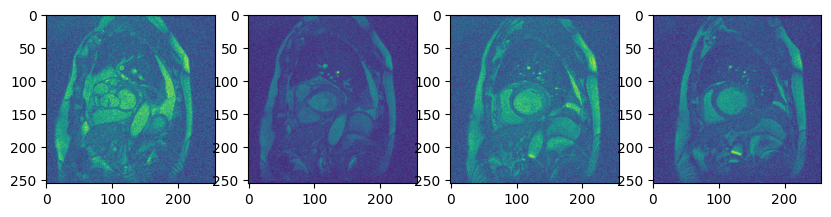

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.imshow(patient['image'][1,i,:,:].cpu())

In [47]:
### Libraries
import os
import sys

import torch
import torch.nn as nn
import torch.nn.functional as F
# from utils import UnetConv3, UnetUp3, UnetUp3_CT

import functools
import time

import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import init
from torch.optim import lr_scheduler

In [48]:

"""
3D U-Net: Learning Dense Volumetric Segmentation from Sparse Annotation
Paper URL: https://arxiv.org/abs/1606.06650
Author: Amir Aghdam
"""


from torch import nn
from torchsummary import summary
import torch
import time

class Conv3DBlock(nn.Module):
    """
    The basic block for double 3x3x3 convolutions in the analysis path
    -- __init__()
    :param in_channels -> number of input channels
    :param out_channels -> desired number of output channels
    :param bottleneck -> specifies the bottlneck block
    -- forward()
    :param input -> input Tensor to be convolved
    :return -> Tensor
    """

    def __init__(self, in_channels, out_channels, bottleneck = False) -> None:
        super(Conv3DBlock, self).__init__()
        self.conv1 = nn.Conv3d(in_channels= in_channels, out_channels=out_channels//2, kernel_size=(3,3,3), padding=1)
        self.bn1 = nn.BatchNorm3d(num_features=out_channels//2)
        self.conv2 = nn.Conv3d(in_channels= out_channels//2, out_channels=out_channels, kernel_size=(3,3,3), padding=1)
        self.bn2 = nn.BatchNorm3d(num_features=out_channels)
        self.relu = nn.ReLU()
        self.bottleneck = bottleneck
        if not bottleneck:
            self.pooling = nn.MaxPool3d(kernel_size=(2,2,2), stride=2)


    def forward(self, input):
        res = self.relu(self.bn1(self.conv1(input)))
        res = self.relu(self.bn2(self.conv2(res)))
        out = None
        if not self.bottleneck:
            out = self.pooling(res)
        else:
            out = res
        return out, res




class UpConv3DBlock(nn.Module):
    """
    The basic block for upsampling followed by double 3x3x3 convolutions in the synthesis path
    -- __init__()
    :param in_channels -> number of input channels
    :param out_channels -> number of residual connections' channels to be concatenated
    :param last_layer -> specifies the last output layer
    :param num_classes -> specifies the number of output channels for dispirate classes
    -- forward()
    :param input -> input Tensor
    :param residual -> residual connection to be concatenated with input
    :return -> Tensor
    """

    def __init__(self, in_channels, res_channels=0, last_layer=False, num_classes=None) -> None:
        super(UpConv3DBlock, self).__init__()
        assert (last_layer==False and num_classes==None) or (last_layer==True and num_classes!=None), 'Invalid arguments'
        self.upconv1 = nn.ConvTranspose3d(in_channels=in_channels, out_channels=in_channels, kernel_size=(2, 2, 2), stride=2)
        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm3d(num_features=in_channels//2)
        self.conv1 = nn.Conv3d(in_channels=in_channels+res_channels, out_channels=in_channels//2, kernel_size=(3,3,3), padding=(1,1,1))
        self.conv2 = nn.Conv3d(in_channels=in_channels//2, out_channels=in_channels//2, kernel_size=(3,3,3), padding=(1,1,1))
        self.last_layer = last_layer
        if last_layer:
            self.conv3 = nn.Conv3d(in_channels=in_channels//2, out_channels=num_classes, kernel_size=(1,1,1))


    def forward(self, input, residual=None):
        out = self.upconv1(input)
        if residual!=None:
          # print("shape input after upconv1:", out.shape)
          # print("shape residual:", residual.shape)
          if(out.shape[2]==4):
              # print("flag")
              out = F.interpolate(out, size=(5, 128, 128), mode='trilinear', align_corners=False)
          out = torch.cat((out, residual), 1)
          # print("--------- output of upblock:")
          # print("concate shape:", out.shape)
          # print("Flag none")
        out = self.relu(self.bn(self.conv1(out)))
        # print("out shape:", out.shape)
        out = self.relu(self.bn(self.conv2(out)))
        # print("out shape:", out.shape)
        if self.last_layer: out = self.conv3(out)
        # print("out shape:", out.shape)
        return out



class UNet3D(nn.Module):
    """
    The 3D UNet model
            the source code of 3D U-Net
            https://github.com/AghdamAmir/3D-UNet/blob/main/train.py
    """

    def __init__(self, in_channels, num_classes, level_channels=[64, 128, 256], bottleneck_channel=512) -> None:
        super(UNet3D, self).__init__()
        level_1_chnls, level_2_chnls, level_3_chnls = level_channels[0], level_channels[1], level_channels[2]
        self.a_block1 = Conv3DBlock(in_channels=in_channels, out_channels=level_1_chnls)
        self.a_block2 = Conv3DBlock(in_channels=level_1_chnls, out_channels=level_2_chnls)
        self.a_block3 = Conv3DBlock(in_channels=level_2_chnls, out_channels=level_3_chnls)
        self.bottleNeck = Conv3DBlock(in_channels=level_3_chnls, out_channels=bottleneck_channel, bottleneck= True)
        self.s_block3 = UpConv3DBlock(in_channels=bottleneck_channel, res_channels=level_3_chnls)
        self.s_block2 = UpConv3DBlock(in_channels=level_3_chnls, res_channels=level_2_chnls)
        self.s_block1 = UpConv3DBlock(in_channels=level_2_chnls, res_channels=level_1_chnls, num_classes=num_classes, last_layer=True)

    def forward(self, input):
        #Analysis path forward feed
        # print("shape of input: ", input.shape)
        out, residual_level1 = self.a_block1(input)
        # print("shape of out:", out.shape)
        # print("shape of residual_level1: ", residual_level1.shape)

        out, residual_level2 = self.a_block2(out)
        # print("shape of out:", out.shape)
        # print("shape of residual_level2: ", residual_level2.shape)

        out, residual_level3 = self.a_block3(out)
        # print("shape of out:", out.shape)
        # print("shape of residual_level3: ", residual_level3.shape)

        out, _ = self.bottleNeck(out)
        # print("shape of out bottleNeck: ", out.shape)

        #Synthesis path forward feed
        out = self.s_block3(out, residual_level3)
        # print("shape s_block3: ", out.shape)
        out = self.s_block2(out, residual_level2)
        # print("shape s_block2: ", out.shape)
        out = self.s_block1(out, residual_level1)
        # print("shape s_block3: ", out.shape)
        return out



In [19]:
class DiceLoss(nn.Module):
    def __init__(self, n_classes):
        super(DiceLoss, self).__init__()
        self.n_classes = n_classes

    def _one_hot_encoder(self, input_tensor):
        tensor_list = []
        for i in range(self.n_classes):
            temp_prob = input_tensor == i * torch.ones_like(input_tensor)
            tensor_list.append(temp_prob)
        output_tensor = torch.cat(tensor_list, dim=1)
        return output_tensor.float()

    def _dice_loss(self, score, target):
        target = target.float()
        smooth = 1e-5
        intersect = torch.sum(score * target)
        y_sum = torch.sum(target * target)
        z_sum = torch.sum(score * score)
        loss = (2 * intersect + smooth) / (z_sum + y_sum + smooth)
        loss = 1 - loss
        return loss

    def forward(self, inputs, target, weight=None, softmax=False):
        if softmax:
            inputs = torch.softmax(inputs, dim=1)
        # print("shape target:", target.shape)
        target = self._one_hot_encoder(target)
        # print("shape target after one hot:", target.shape)
        if weight is None:
            weight = [1] * self.n_classes
        assert inputs.size() == target.size(), 'predict & target shape do not match'
        class_wise_dice = []
        loss = 0.0
        # print(target[:, 0])
        for i in range(1, self.n_classes):
            dice = self._dice_loss(inputs[:, i], target[:, i])
            class_wise_dice.append(1.0 - dice.item())
            loss += dice * weight[i]
        return loss / self.n_classes


def entropy_minmization(p):
    y1 = -1*torch.sum(p*torch.log(p+1e-6), dim=1)
    ent = torch.mean(y1)

    return ent


def entropy_map(p):
    ent_map = -1*torch.sum(p * torch.log(p + 1e-6), dim=1,
                           keepdim=True)
    return ent_map


def compute_kl_loss(p, q):
    p_loss = F.kl_div(F.log_softmax(p, dim=-1),
                      F.softmax(q, dim=-1), reduction='none')
    q_loss = F.kl_div(F.log_softmax(q, dim=-1),
                      F.softmax(p, dim=-1), reduction='none')

    # Using function "sum" and "mean" are depending on your task
    p_loss = p_loss.mean()
    q_loss = q_loss.mean()

    loss = (p_loss + q_loss) / 2
    return loss

In [20]:
import math
from torch.nn import init
import torch.optim as optim
import argparse
import logging
import os
import random
import shutil
import sys
import time
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.modules.loss import CrossEntropyLoss

model = UNet3D(num_classes=4, in_channels=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
print("device:", device)
model.to(device)
# model.to(torch.device("cuda:0"))

# print("model.device:", model.device)
base_lr = 5e-3
## Define optimizer
optimizer = optim.SGD(model.parameters(), lr=base_lr,
                      momentum=0.9, weight_decay=0.0001)

## define loss function
ce_loss = CrossEntropyLoss()
dice_loss = DiceLoss(4)

device: cuda


In [21]:
import torch
torch.cuda.empty_cache()
from torchsummary import summary
summary(model, input_size = (1,10, 256, 256), batch_size = 5)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1      [5, 32, 10, 256, 256]             896
       BatchNorm3d-2      [5, 32, 10, 256, 256]              64
              ReLU-3      [5, 32, 10, 256, 256]               0
            Conv3d-4      [5, 64, 10, 256, 256]          55,360
       BatchNorm3d-5      [5, 64, 10, 256, 256]             128
              ReLU-6      [5, 64, 10, 256, 256]               0
         MaxPool3d-7       [5, 64, 5, 128, 128]               0
       Conv3DBlock-8  [[-1, 64, 5, 128, 128], [-1, 64, 10, 256, 256]]               0
            Conv3d-9       [5, 64, 5, 128, 128]         110,656
      BatchNorm3d-10       [5, 64, 5, 128, 128]             128
             ReLU-11       [5, 64, 5, 128, 128]               0
           Conv3d-12      [5, 128, 5, 128, 128]         221,312
      BatchNorm3d-13      [5, 128, 5, 128, 128]             256
             ReLU

In [22]:
import torch
import numpy as np

import numpy
from scipy.ndimage import _ni_support
from scipy.ndimage.morphology import distance_transform_edt, binary_erosion,\
    generate_binary_structure
from scipy.ndimage.measurements import label, find_objects
from scipy.stats import pearsonr


def dc(result, reference):

    result = numpy.atleast_1d(result.astype(numpy.bool))
    # print("result:",result[:10])
    reference = numpy.atleast_1d(reference.astype(numpy.bool))
    # print("reference:", reference.shape, "result:", result.shape)
    intersection = numpy.count_nonzero(result & reference)

    size_i1 = numpy.count_nonzero(result)
    size_i2 = numpy.count_nonzero(reference)

    try:
        dc = 2. * intersection / float(size_i1 + size_i2)
    except ZeroDivisionError:
        dc = 0.0

    return dc

def one_hot_encoders(input_tensor, num_classes):
    tensor_list = []
    for i in range(num_classes):
        temp_prob = input_tensor == i * torch.ones_like(input_tensor)
        tensor_list.append(temp_prob)
    output_tensor = torch.cat(tensor_list, dim=1)
    return output_tensor.float()


<ipython-input-22-e62f4dfa1716>:6: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt, binary_erosion,\
<ipython-input-22-e62f4dfa1716>:6: DeprecationWarning: Please use `binary_erosion` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt, binary_erosion,\
<ipython-input-22-e62f4dfa1716>:6: DeprecationWarning: Please use `generate_binary_structure` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt, binary_erosion,\
<ipython-input-22-e62f4dfa1716>:8: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label, 

In [23]:
import matplotlib.pyplot as plt

def plot_loss(train_loss, val_loss):
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.savefig(f'loss_plot.png')
    plt.close()

# Training loop
patience = 5
num_epochs = 100
total_iterations = len(train_dataloader)
# model.load_state_dict(torch.load('/content/drive/MyDrive/data/final_model.pt'))


def vadidation(val_dataloader,model, num_classes, set ):
  model.eval()
  val_loss = 0.0
  val_correct = 0
  total_val_samples = 0
  dice_score = 0
  with torch.no_grad():
      for data in val_dataloader:
          inputs = data['image'].to(device)
          labels = data['label'].to(device)
          inputs = inputs.unsqueeze(1)

          outputs = model(inputs)
          outputs_soft = torch.softmax(outputs, dim=1)
          loss_dice = dice_loss(outputs_soft, labels.unsqueeze(1))
          loss = loss_dice
          # val_loss += loss.item() * inputs.size(0)
          val_loss += loss.item()

          ##Calculating the dice score
          labels = one_hot_encoders(labels.unsqueeze(1), num_classes)
          outputs_soft = np.where(outputs_soft.cpu()> 0.5, 1, 0)

          dice_score += dc(np.array(outputs_soft), np.array(labels.cpu()))
  if (set =="validation"):
    print(f'Epoch {epoch + 1}/{num_epochs} \t Validation Loss: {val_loss / len(val_dataloader):.4f}')
    print(f'\n Dice_score for validation : {dice_score / len(val_dataloader):.4f}')
    return val_loss / len(val_dataloader)
  else:
    print(f'\n Dice_score for train : {dice_score / len(val_dataloader):.4f}')

train_losses = []
val_losses = []
best_val_loss = float('inf')

for epoch in range(num_epochs):
    # print("epoch number: ",epoch)
    # Training
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train_samples = 0
    iter_num = 0
    for i, data in enumerate(train_dataloader):
        inputs = data['image'].to(device)
        labels = data['label'].to(device)
        inputs = inputs.unsqueeze(1)  # Add an extra dimension
        # inputs = inputs.permute(0, 2, 1, 3, 4)

        # print("inputs.shape:",inputs.shape)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        outputs_soft = torch.softmax(outputs, dim=1)

        # Compute loss
        # print(outputs_soft.shape,labels.unsqueeze(1).shape)
        loss_dice = dice_loss(outputs_soft, labels.unsqueeze(1))
        loss = (loss_dice)
        # train_loss += loss.item() * inputs.size(0)
        train_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ## validation

        ## print the loss values for each iteration
        iter_num += 1
        sys.stdout.write('\r')
        sys.stdout.write(
            f'Epoch {epoch + 1}/{num_epochs} \t Iteration {iter_num}/{total_iterations} \t Training Loss: {train_loss / (i + 1):.4f}'
        )
        sys.stdout.flush()
        # vadidation(val_dataloader,model,num_classes = 4 )

    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_dataloader)} ')
    train_losses.append(train_loss/len(train_dataloader))
    # Validation
    avg_val_loss = vadidation(val_dataloader,model, num_classes = 4, set= 'validation')
    val_losses.append(avg_val_loss)
    plot_loss(train_losses, val_losses)
    # Validation
    # vadidation(train_dataloader,model, num_classes = 4, set= 'train')
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch
        # torch.save(model.state_dict(), '/content/drive/MyDrive/data/augmentation_model.pth')

    if epoch - best_epoch >= patience:
        print(f'Early stopping! No improvement in validation loss for {patience} epochs.')
        print(f'Best loss at Epoch {best_epoch}')
        torch.save(model.state_dict(), '/content/drive/MyDrive/data/augmentation_model.pth')

        break


Epoch 1/100 	 Iteration 54/54 	 Training Loss: 0.6550Epoch 1 		 Training Loss: 0.6550207458160542 


<ipython-input-22-e62f4dfa1716>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = numpy.atleast_1d(result.astype(numpy.bool))
<ipython-input-22-e62f4dfa1716>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  reference = numpy.atleast_1d(reference.astype(numpy.bool))


Epoch 1/100 	 Validation Loss: 0.7172

 Dice_score for validation : 0.0106
Epoch 2/100 	 Iteration 54/54 	 Training Loss: 0.5888Epoch 2 		 Training Loss: 0.5888255061926665 
Epoch 2/100 	 Validation Loss: 0.7336

 Dice_score for validation : 0.0102
Epoch 3/100 	 Iteration 54/54 	 Training Loss: 0.5083Epoch 3 		 Training Loss: 0.5082783737668285 
Epoch 3/100 	 Validation Loss: 0.7384

 Dice_score for validation : 0.0103
Epoch 4/100 	 Iteration 54/54 	 Training Loss: 0.4314Epoch 4 		 Training Loss: 0.4313984215259552 
Epoch 4/100 	 Validation Loss: 0.7396

 Dice_score for validation : 0.0120
Epoch 5/100 	 Iteration 54/54 	 Training Loss: 0.3853Epoch 5 		 Training Loss: 0.3852835672873038 
Epoch 5/100 	 Validation Loss: 0.7300

 Dice_score for validation : 0.0122
Epoch 6/100 	 Iteration 54/54 	 Training Loss: 0.3446Epoch 6 		 Training Loss: 0.3446169352089917 
Epoch 6/100 	 Validation Loss: 0.7131

 Dice_score for validation : 0.0781
Epoch 7/100 	 Iteration 54/54 	 Training Loss: 0.2996Ep

In [ ]:
torch.cuda.empty_cache()

In [24]:
save_path = '/content/drive/MyDrive/data/final_model-5.pt'
torch.save(model.state_dict(), save_path)

In [ ]:
### test dice score function

# num_classes =4
# dice_score = 0

# _, target = next(iter(train_dataloader))
# for i, (inputs, labels) in enumerate(train_dataloader):
#     _, target = next(iter(train_dataloader))
#     labels = one_hot_encoders(labels.unsqueeze(1), num_classes)
#     outputs_soft =  one_hot_encoders(target.unsqueeze(1), num_classes)
#     dice_score += dc(np.array(outputs_soft), np.array(labels))
#     print("dice_score:", dice_score)
# print(f'\n Dice_score for validation : {dice_score / len(train_dataloader):.4f}')


In [ ]:
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
  inputs, labels = next(iter(val_dataloader))
  inputs = inputs.to(device)
  labels = labels.to(device)
  inputs = inputs.unsqueeze(1)
  outputs = model(inputs)
  outputs_soft = torch.softmax(outputs, dim=1)
  outputs_soft = torch.argmax(outputs_soft, dim= 1)
  print("outputs_soft:",outputs_soft.shape)
  print("labels:",labels.shape)

plt.figure(figsize =(10,10))
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.imshow(outputs_soft[0,i,:,:].cpu())

In [ ]:
plt.figure(figsize =(10,10))
for i in range(0,4):
  plt.subplot(1,4,i+1)
  plt.imshow(labels[0,i,:,:].cpu())

In [ ]:
plt.figure(figsize =(5,5))
plt.subplot(1,2,1)
plt.imshow(labels[0,5,:,:].cpu())
plt.subplot(1,2,2)
plt.imshow(inputs[0,0,5,:,:].cpu())


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image_file_path_tr = r'/content/drive/MyDrive/data/Test_img_10frame_256.npy'
mask_file_path_tr = r'/content/drive/MyDrive/data/Test_msk_10frame_256.npy'

image = np.load(image_file_path_tr)
mask = np.load(mask_file_path_tr)


In [49]:
model = UNet3D(num_classes=4, in_channels=1).to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/data/final_model-4.pt'))

<All keys matched successfully>

In [26]:
## load data
image_file_path_tr = r'/content/drive/MyDrive/data/ExternalTestSet_25frames.npy'


sec_test = np.load(image_file_path_tr)
print("sec_test.shape:",sec_test.shape)
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, image_file_path):
        self.images = np.load(image_file_path)
        # self.masks = np.load(mask_file_path)

    def __getitem__(self, index):
        # Get an individual image and mask pair from the dataset
        image = self.images[index]
        # mask = self.masks[index]

        # Convert the image and mask to PyTorch tensors
        image = torch.from_numpy(image)
        # mask = torch.from_numpy(mask)

        # Return the processed image and mask
        return image

    def __len__(self):
        return len(self.images)




batch_size = 1

# Create an instance of your custom dataset
dataset = CustomDataset(image_file_path_tr)

# Create a DataLoader
Sec_test_dataloader = DataLoader(dataset, batch_size=batch_size , shuffle=False, num_workers=0)


sample= next(iter(Sec_test_dataloader))
print(sample.shape)

sec_test.shape: (25, 10, 256, 256)
torch.Size([1, 10, 256, 256])


In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available

In [28]:
model.eval()
val_loss = 0.0
val_correct = 0
total_val_samples = 0
dice_score = 0
input_data = np.zeros((25,10, 256, 256))
Final_data= np.zeros((25,10, 256, 256))
with torch.no_grad():
    count=0
    for inputs in Sec_test_dataloader:
        inputs = inputs.to(device)
        # labels = labels.to(device)
        inputs = inputs.unsqueeze(1)

        outputs = model(inputs)
        outputs_soft = torch.softmax(outputs, dim=1)
        outputs_soft = torch.argmax(outputs_soft, dim= 1)
        input_data[count,:,:,:] = inputs[0,:,:,:].cpu()
        Final_data[count,:,:,:] = outputs_soft[0,:,:,:].cpu()
        print("outputs_soft.shape:", outputs_soft.shape)
        count+=1

outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])
outputs_soft.shape: torch.Size([1, 10, 256, 256])


ValueError: ignored

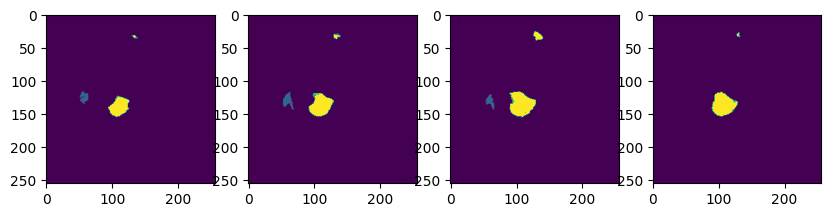

In [33]:
import matplotlib.pyplot as plt

# model.eval()
# with torch.no_grad():
#   inputs, labels = next(iter(val_dataloader))
#   inputs = inputs.to(device)
#   labels = labels.to(device)
#   inputs = inputs.unsqueeze(1)
#   outputs = model(inputs)
#   outputs_soft = torch.softmax(outputs, dim=1)
#   print("outputs_soft:",outputs_soft.shape)
#   print("labels:",labels.shape)

plt.figure(figsize =(10,10))
for i in range(0,10):
  plt.subplot(1,4,i+1)
  plt.imshow(Final_data[0,i+3,:,:])

ValueError: ignored

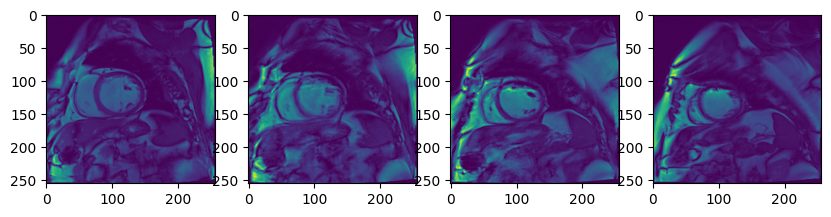

In [34]:
plt.figure(figsize =(10,10))
for i in range(0,10):
  plt.subplot(1,4,i+1)
  plt.imshow(input_data[0,i+3,:,:])

In [20]:
!pip install SimpleITK

In [29]:
import nibabel as nib
import SimpleITK as sitk
from scipy.ndimage import zoom

for i in range(len(Final_data)):
    img_arr = Final_data[i]
    # img = nib.Nifti1Image(Final_data[i], affine=np.eye(4))
    count = 151+i
    folder_name = 'patient'+str(count)
    im_name = 'patient'+str(count)+'_frame01_seg.nii.gz'
    in_im_name = 'patient'+str(count)+'_frame01.nii.gz'
    in_path = os.path.join('/content/drive/MyDrive/data/test_set', folder_name, in_im_name)
    out_path = os.path.join('/content/drive/MyDrive/data/save_img', im_name)
    in_img = sitk.ReadImage(in_path)
    in_array = sitk.GetArrayFromImage(in_img)
    in_array  = in_array[0]
    depth, width, height = in_array.shape
    resized_mask = zoom(img_arr, (depth / 10, width / 256, height / 256), order=0)
    resized_mask = resized_mask.astype(np.int32)
    print('input shape:',in_array.shape)
    print('ouput initial shape:', img_arr.shape)
    print('output final shape:', resized_mask.shape)
    img = nib.Nifti1Image(resized_mask, affine=np.eye(4))
    print('File shape', img.shape)
    nib.save(img, out_path)

input shape: (13, 256, 216)
ouput initial shape: (10, 256, 256)
output final shape: (13, 256, 216)
File shape (13, 256, 216)
input shape: (10, 320, 320)
ouput initial shape: (10, 256, 256)
output final shape: (10, 320, 320)
File shape (10, 320, 320)
input shape: (13, 256, 208)
ouput initial shape: (10, 256, 256)
output final shape: (13, 256, 208)
File shape (13, 256, 208)
input shape: (13, 256, 208)
ouput initial shape: (10, 256, 256)
output final shape: (13, 256, 208)
File shape (13, 256, 208)
input shape: (11, 256, 256)
ouput initial shape: (10, 256, 256)
output final shape: (11, 256, 256)
File shape (11, 256, 256)
input shape: (12, 256, 208)
ouput initial shape: (10, 256, 256)
output final shape: (12, 256, 208)
File shape (12, 256, 208)
input shape: (11, 240, 196)
ouput initial shape: (10, 256, 256)
output final shape: (11, 240, 196)
File shape (11, 240, 196)
input shape: (10, 320, 320)
ouput initial shape: (10, 256, 256)
output final shape: (10, 320, 320)
File shape (10, 320, 320)


In [ ]:
/content/drive/MyDrive/data/test_set/patient151/patient151_frame01.nii.gz

In [ ]:
Final_data.shape

In [69]:
## Plot image and mask

patient_name = 'patient167'
image_name = patient_name+'_frame01.nii.gz'
mask_name = patient_name+'_frame01_seg.nii.gz'
image_path = os.path.join('/content/drive/MyDrive/data/test_set', patient_name, image_name)
mask_path = os.path.join('/content/drive/MyDrive/data/save_img', mask_name)
image = sitk.ReadImage(image_path)
image_array = sitk.GetArrayFromImage(image)
image_array = image_array[0]
mask = nib.load(mask_path)
mask_array = mask.get_fdata()
print(image_array.shape)
print(mask_array.shape)

(8, 256, 208)
(8, 256, 208)


In [ ]:
# i = 0
# img_arr = Final_data[0]
# # img = nib.Nifti1Image(Final_data[i], affine=np.eye(4))
# count = 151+i
# folder_name = 'patient'+str(count)
# im_name = 'patient'+str(count)+'_frame01_seg.nii.gz'
# in_im_name = 'patient'+str(count)+'_frame01.nii.gz'
# in_path = os.path.join('/content/drive/MyDrive/data/test_set', folder_name, in_im_name)
# out_path = os.path.join('/content/drive/MyDrive/data/', im_name)
# in_img = sitk.ReadImage(in_path)
# in_array = sitk.GetArrayFromImage(in_img)
# in_array  = in_array[0]
# depth, width, height = in_array.shape
# resized_mask = zoom(img_arr, (depth / 10, width / 256, height / 256), order=0)
# resized_mask = resized_mask.astype(np.int32)
# print('input shape:',in_array.shape)
# print('ouput initial shape:', img_arr.shape)
# print('output final shape:', resized_mask.shape)
# img = nib.Nifti1Image(resized_mask, affine=np.eye(4))
# print('File shape', img.shape)
# nib.save(img, out_path)

In [ ]:
# img = sitk.ReadImage('/content/drive/MyDrive/data/patient151_frame01_seg.nii.gz')
# img_arr = sitk.GetArrayFromImage(img)
# img_arr.shape
# img = nib.load('/content/drive/MyDrive/data/patient151_frame01_seg.nii.gz')
# mask_array = img.get_fdata()
# mask_array.shape

IndexError: ignored

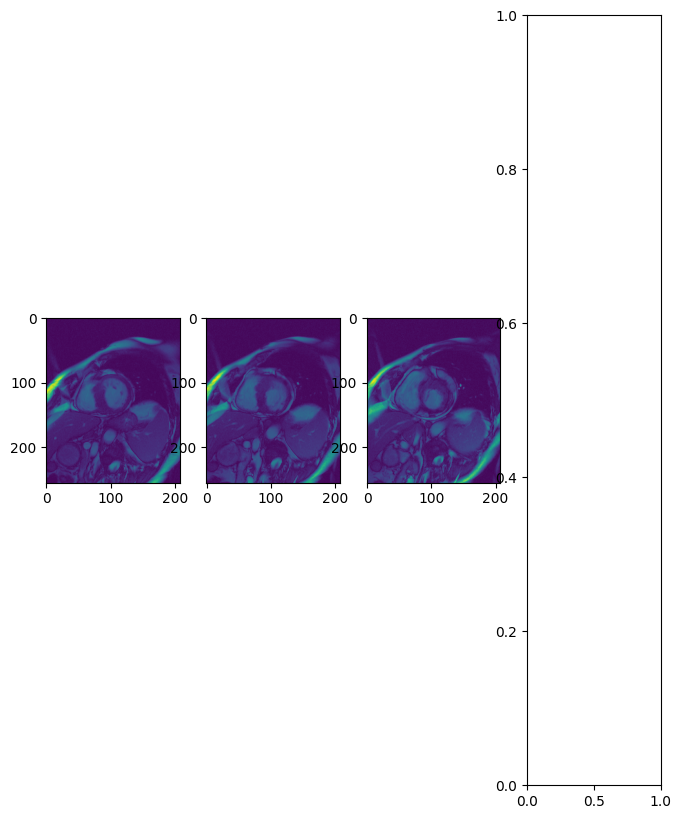

In [70]:
plt.figure(figsize =(10,10))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.imshow(image_array[i+5,:,:])

IndexError: ignored

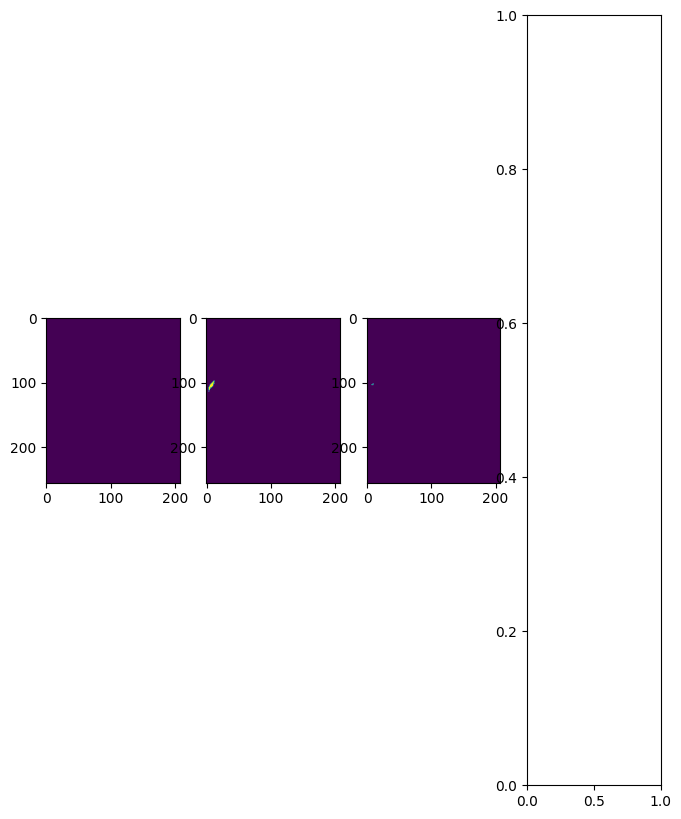

In [71]:
plt.figure(figsize =(10,10))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.imshow(mask_array[i+5,:,:])

(25, 10, 256, 256)


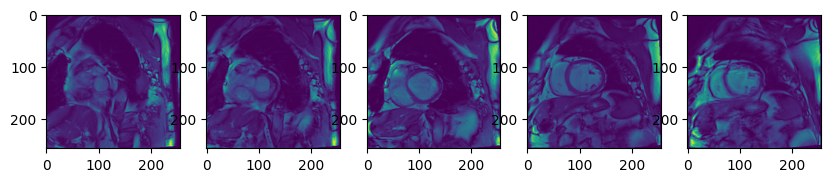

In [25]:
image_file_path_tr = r'/content/drive/MyDrive/data/ExternalTestSet_25frames.npy'

test_array = np.load(image_file_path_tr)
print(test_array.shape)

plt.figure(figsize =(10,10))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.imshow(test_array[0,i,:,:])

In [ ]:
test_array.min()

In [ ]:
test_array.max()